## ЛР №10 - Гольштайн-Прайс


In [1]:
import Pkg
Pkg.add("Plots")
using Plots
Pkg.add("LinearAlgebra")

   Resolving package versions...
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Manifest.toml`


In [2]:
using LinearAlgebra
function df(f, x::Vector{Float64}, i, h=1e-5)
    x_plus = copy(x)
    x_minus = copy(x)
    
    x_plus[i] += h
    x_minus[i] -= h
    
    df_dx = (f(x_plus) - f(x_minus)) / (2h)
    
    return df_dx
end

df (generic function with 2 methods)

In [3]:
using LinearAlgebra

function swann_method(f, x0, h=0.1)
    first = x0
    second = x0 + h
    # если функция растет, меняем направление движения
    if f(second) > f(first)
        h = -h
        first, second = second, second + h
    end
    last = second + h
    
    # увеличиваем шаг движения, если функция уменьшается
    while f(last) < f(second)
        h *= 2
        first, second, last = second, last, last + h
    end
    # перепрыгнули далеко
    if second > last
        first, second, last = last, second, first
    end

    return first, last
end

swann_method (generic function with 2 methods)

In [4]:
using LinearAlgebra

function golden_section_search(f, a, b, eps=1e-5)
    phi = (sqrt(5) - 1) / 2 
    x1 = b - phi * (b - a)
    x2 = a + phi * (b - a)
    
    while abs(b - a) > eps
        if f(x1) <= f(x2)
            b = x2
        else
            a = x1
        end
        x1 = b - phi * (b - a)
        x2 = a + phi * (b - a)
    end
    
    return (a + b) / 2
end

golden_section_search (generic function with 2 methods)

In [5]:
# max_iter = 50

# function golstein_price(f, start, epsilon)
#     x = copy(start)
#     points = [copy(x)]

#     n = length(x)
#     H = Matrix{Float64}(I(n))
#     r = 0.2
#     gradient = [df(f, x, i) for i in 1:n]
#     phi = -gradient
#     i = 0

#     while norm(phi) > epsilon && i < max_iter
#         phi = -inv(H) * gradient
#         theta = r * norm(phi)
#         for k in 1:n
#             x_1 = x + theta * I(n)[:,k]
#             H[:, k] = [df(f, x_1, j) for j in 1:n] - gradient
#         end
#         F(l) = -(f(x) - f(x + l * phi)) / (l * (gradient' * phi))
#         a, b = swann_method(alpha -> abs(F(alpha) - 1/3), 1, 1e-2)
#         alpha = golden_section_search(alpha -> abs(F(alpha) - 1/3), a, b, 1e-4)
#         x += alpha * phi

#         gradient = [df(f, x, j) for j in 1:n]
#         push!(points, copy(x))
#         i += 1
#     end

#     return points, i
# end

golstein_price (generic function with 1 method)

In [7]:
# func(x, y) = (x-4*y)^2 +(y+5)^2
# f(x) = func(x[1],x[2])
# x0 = [10.0, -5.0] 
# eps = 0.15

0.15

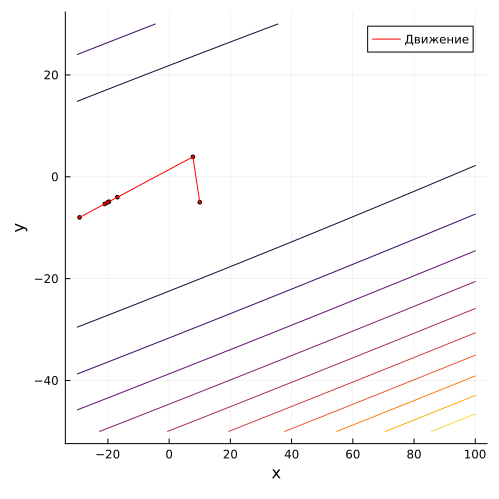

Метод Гольштайна и Прайса:
 точка минимума: [-20.114309552732287, -5.03671913362827]
 кол-во итераций = 6


In [9]:
# trajectory, i = golstein_price(f, x0, eps)
# x_min = trajectory[end]

# x = -30:1:100
# y = -50:1:30
# x_coords = [point[1] for point in trajectory]
# y_coords = [point[2] for point in trajectory]
# contour(x, y, (x, y) -> f([x, y]), levels = 10, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
# scatter!(x_coords, y_coords, markersize=2, markershape=:circle, markercolor=:red, label = "")
# p = plot!(x_coords, y_coords, label="Движение", line=:red)
# println("Метод Гольштайна и Прайса:\n точка минимума: $x_min\n кол-во итераций = $i")
# p

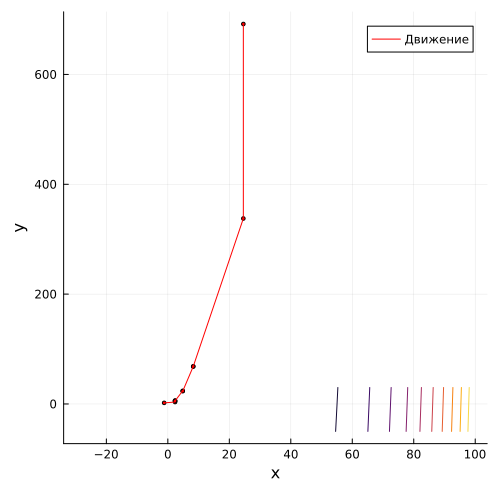

Метод Гольштайна и Прайса:
 точка минимума: [24.562361267368306, 691.847511284284]
 кол-во итераций = 10


In [11]:
# ros(x) = (1 - x[1])^2 + 100 * (x[2] - x[1]^2)^2
# x0 = [-1.2, 2.0]
# eps = 1e-4

# trajectory, i = golstein_price(ros, x0, eps)
# x_min = trajectory[end]

# x = -30:1:100
# y = -50:1:30
# x_coords = [point[1] for point in trajectory]
# y_coords = [point[2] for point in trajectory]
# contour(x, y, (x, y) -> ros([x, y]), levels = 10, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
# scatter!(x_coords, y_coords, markersize=2, markershape=:circle, markercolor=:red, label = "")
# p = plot!(x_coords, y_coords, label="Движение", line=:red)
# println("Метод Гольштайна и Прайса:\n точка минимума: $x_min\n кол-во итераций = $i")
# p

Метод Гольштайна и Прайса:
 точка минимума: [-20.00030519166519, -4.999999999983905]
 кол-во итераций = 6


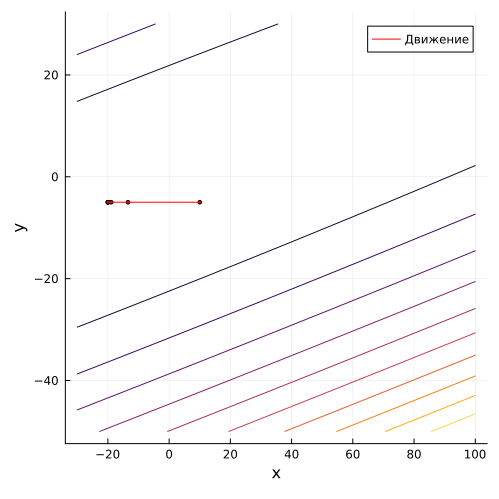

In [14]:
using LinearAlgebra
using Plots

function test(x)
    (x[1]-4*x[2])^2 +(x[2]+5)^2
end

# function df1(f, x, der)
#     h = 1e-3
#     new_x_plus = copy(x)
#     new_x_minus = copy(x)

#     new_x_plus[der] = x[der] + h
#     new_x_minus[der] = x[der] - h

#     return (f(new_x_plus) - f(new_x_minus)) / 2h
# end

function df(f, x::Vector{Float64}, i, h=1e-5)
    x_plus = copy(x)
    x_minus = copy(x)
    
    x_plus[i] += h
    x_minus[i] -= h
    
    df_dx = (f(x_plus) - f(x_minus)) / (2h)
    
    return df_dx
end

function gradient(f, x)
    return [df(f, x, 1), df(f, x, 2)]
end

function find_alpha(f, delta, x_k, phi)

    alpha = 100.0

    F(alpha) = -(f(x_k) - f(x_k + alpha * phi)) / (alpha * transpose(gradient(f, x_k)) * phi)

    while !(delta <= F(alpha) <= (1 - delta))
        alpha /= 2

        # if alpha == 1
        #     alpha -= 0.03
        # end

        if alpha < 1e-8
            
            break
        end
    end
    
    return alpha
end

function golstein_price_(f, x_0, delta=0.25, r=1.0, eps=1e-3)
    E = [1.0 0.0; 0.0 1.0]
    x = [x_0]
    x_k = x_0
    hess = [0.0 0.0; 0.0 0.0]

    k = 0
    phi = -gradient(f, x_k)
    teta = r
    alpha = 100.0

    while true
        for i in 1:2
            h = gradient(f, x_k + teta * E[:, i]) - gradient(f, x_k)
            hess[:, i] = h
        end

        # println(hess)

        if transpose(gradient(f, x_k)) * inv(hess) * gradient(f, x_k) > 0
        # if dot(gradient(f, x_k), inv(hess) * gradient(f, x_k)) > 0
            phi = -inv(hess) * gradient(f, x_k)
        else
            phi = -gradient(f, x_k)
        end 

        # F(alpha) = (f(x_k) - f(x_k + alpha * phi)) / (alpha * dot(gradient(f, x_k), phi))
        # F(alpha) = (f(x_k) - f(x_k + alpha * phi)) / (alpha * transpose(gradient(f, x_k)) * phi)

        alpha = find_alpha(f, delta, x_k, phi)
        # alpha = one_dim_optimize(f, Ff, alpha, x_k, phi, eps)
        # println(alpha)

        x_k = x_k + alpha * phi
        push!(x, x_k)
        # println(x_k)

        teta = r * norm(phi)
        k += 1
        
        if norm(phi) < eps
            break
        end
    end
    return x_k, x, k
end

x_0 = [10.0, -5.0]
x_min, x, k = golstein_price_(test, x_0)
println("Метод Гольштайна и Прайса:\n точка минимума: $x_min\n кол-во итераций = $k")
px = [x[i][1] for i in 1:length(x)]
py = [x[i][2] for i in 1:length(x)]
x = y = -15:1:5;

x = -30:1:100
y = -50:1:30
contour(x, y, (x, y) -> test([x, y]), levels = 10, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
scatter!(px, py, markersize=2, markershape=:circle, markercolor=:red, label = "")
p = plot!(px, py, label="Движение", line=:red)
p

In [11]:
function ros(x)
    return (1 - x[1])^2 + 100*(x[2] - x[1]^2)^2
end

ros (generic function with 1 method)

Метод Гольштайна и Прайса:
 точка минимума: [1.0384386295305523, 1.0905419387611408]
 кол-во итераций = 16


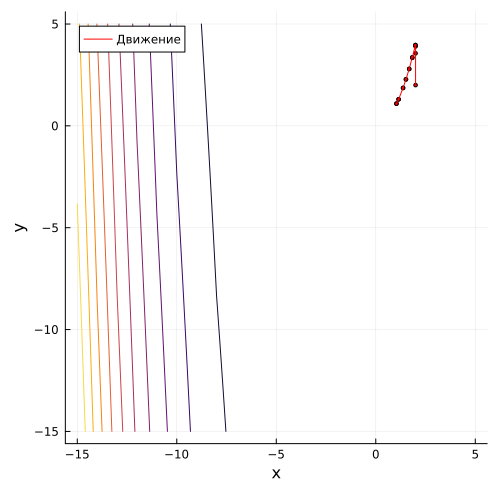

In [12]:
x_0 = [2.0, 2.0]
x_min, x, k = golstein_price_(Rosenbrok, x_0, 0.25, 1.0, 1e-9)
println("Метод Гольштайна и Прайса:\n точка минимума: $x_min\n кол-во итераций = $k")
px = [x[i][1] for i in 1:length(x)]
py = [x[i][2] for i in 1:length(x)]
x = y = -15:1:5;

contour(x, y, (x, y) -> ros([x, y]), levels = 10, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
scatter!(px, py, markersize=2, markershape=:circle, markercolor=:red, label = "")
p = plot!(px, py, label="Движение", line=:red)
p

Метод Гольштайна и Прайса:
 точка минимума: [0.9972904155395611, 0.995008072707516]
 кол-во итераций = 25


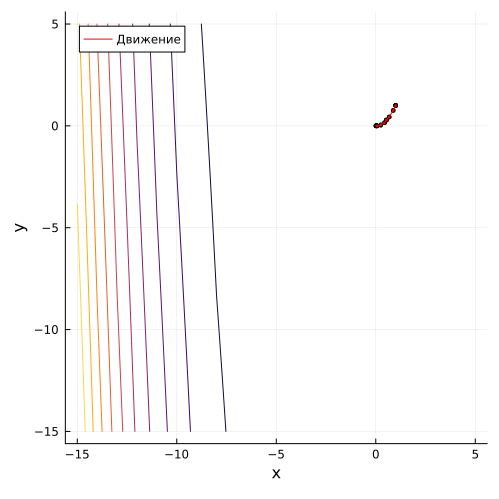

In [13]:
x_0 = [0.0, 0.0]
x_min, x, k = golstein_price_(Rosenbrok, x_0, 0.25, 1.0, 1e-9)
println("Метод Гольштайна и Прайса:\n точка минимума: $x_min\n кол-во итераций = $k")
px = [x[i][1] for i in 1:length(x)]
py = [x[i][2] for i in 1:length(x)]
x = y = -15:1:5;
contour(x, y, (x, y) -> ros([x, y]), levels = 10, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
scatter!(px, py, markersize=2, markershape=:circle, markercolor=:red, label = "")
p = plot!(px, py, label="Движение", line=:red)
p